In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('winequality-red.csv')     # dataset from Lesson17
df.columns = df.columns.str.replace(' ', '_')

# Classification

In [3]:
df_copy = df.copy()
df.loc[df_copy['quality'] >= 6, 'quality'] = 1    # good wine
df.loc[df_copy['quality'] < 6, 'quality'] = 0     # bad wine

In [4]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
X = df.iloc[:, :11]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Decision Tree Classifier**

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Gini
# Decision Tree with depth 3
tree_3 = DecisionTreeClassifier(max_depth=3, random_state=15)
tree_3.fit(X_train, y_train)

y_pred = tree_3.predict(X_test)
print('Decision Tree with depth 3:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, tree_3.predict(X_train))}')

# Decision Tree with depth 6
tree_6 = DecisionTreeClassifier(max_depth=6, random_state=15)
tree_6.fit(X_train, y_train)

y_pred = tree_6.predict(X_test)
print('\nDecision Tree with depth 6:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, tree_6.predict(X_train))}')

# Decision Tree with depth 10
tree_10 = DecisionTreeClassifier(max_depth=10, random_state=15)
tree_10.fit(X_train, y_train)

y_pred = tree_10.predict(X_test)
y_pred_train = tree_10.predict(X_train)
print('\nDecision Tree with depth 10:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, y_pred_train)}')

Decision Tree with depth 3:
Test F1-score = 0.7681660899653978
Train F1-score = 0.7730968218773097

Decision Tree with depth 6:
Test F1-score = 0.7251908396946564
Train F1-score = 0.8415124698310539

Decision Tree with depth 10:
Test F1-score = 0.7490039840637449
Train F1-score = 0.9505962521294719


In [9]:
# Entropy
# Decision Tree with depth 3
tree_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=15)
tree_3.fit(X_train, y_train)

y_pred = tree_3.predict(X_test)
print('Decision Tree with depth 3:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, tree_3.predict(X_train))}')

# Decision Tree with depth 6
tree_6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=15)
tree_6.fit(X_train, y_train)

y_pred = tree_6.predict(X_test)
print('\nDecision Tree with depth 6:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, tree_6.predict(X_train))}')

# Decision Tree with depth 10
tree_10 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)
tree_10.fit(X_train, y_train)

y_pred = tree_10.predict(X_test)
y_pred_train = tree_10.predict(X_train)
print('\nDecision Tree with depth 10:')
print(f'Test F1-score = {f1_score(y_test, y_pred)}')
print(f'Train F1-score = {f1_score(y_train, y_pred_train)}')

Decision Tree with depth 3:
Test F1-score = 0.7582938388625593
Train F1-score = 0.7743732590529249

Decision Tree with depth 6:
Test F1-score = 0.721868365180467
Train F1-score = 0.8215246636771301

Decision Tree with depth 10:
Test F1-score = 0.788118811881188
Train F1-score = 0.9436860068259385


Ошибки F1 деревьев решений с разной глубиной при использовании критериев Джини и энтропии имееют схожие результаты.

Больший отрыв получился у дерева решения с глубиной равной 10. Энтропия показала лучше результат на 3,9%, чем Джинни.

**Random Forest Classifier**

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [12]:
y_pred = rfc.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1_score = {f1}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
precision = precision_score(y_test, y_pred)
print(f'Precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall = {recall}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1_score = 0.8073022312373224
Accuracy = 0.8020833333333334
Precision = 0.8540772532188842
Recall = 0.7653846153846153

Confusion Matrix:
[[186  34]
 [ 61 199]]


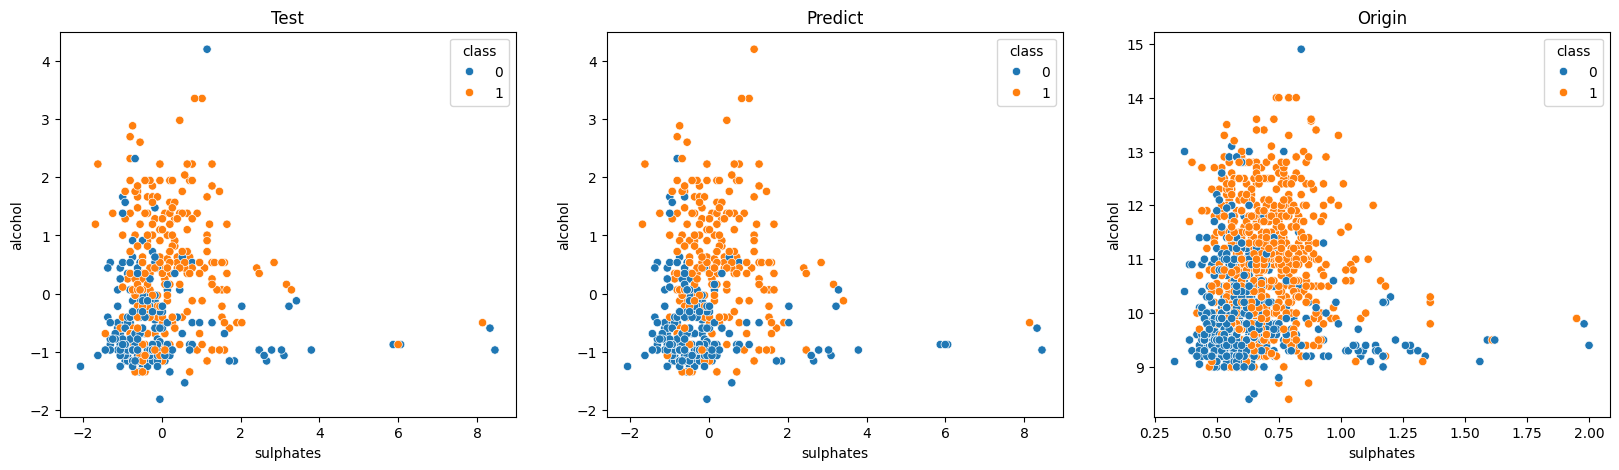

In [13]:
x_sulphates = []
x_alcohol = []

for i in range(len(X_test)):
  x_sulphates.append(X_test[i][-2])
  x_alcohol.append(X_test[i][-1])


plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=x_sulphates, y=x_alcohol, hue=y_test)
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 3, 2)
sns.scatterplot(x=x_sulphates, y=x_alcohol, hue=y_pred)
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['sulphates'], y=df['alcohol'], hue=df['quality'])
plt.legend(title='class')
plt.title('Origin')

plt.show()

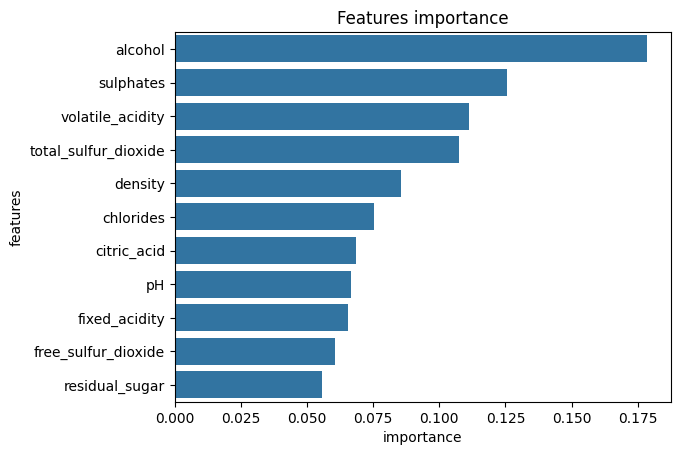

In [14]:
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Features importance')
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

In [15]:
feature_imp

alcohol                 0.178616
sulphates               0.125390
volatile_acidity        0.111178
total_sulfur_dioxide    0.107403
density                 0.085655
chlorides               0.075187
citric_acid             0.068517
pH                      0.066485
fixed_acidity           0.065388
free_sulfur_dioxide     0.060608
residual_sugar          0.055572
dtype: float64

In [16]:
# Оставляем только важные признаки
X = df[['alcohol', 'sulphates', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'chlorides', 'citric_acid']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [18]:
y_pred = rfc.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1_score = {f1}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
precision = precision_score(y_test, y_pred)
print(f'Precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall = {recall}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1_score = 0.8326693227091635
Accuracy = 0.825
Precision = 0.8636363636363636
Recall = 0.8038461538461539

Confusion Matrix:
[[187  33]
 [ 51 209]]


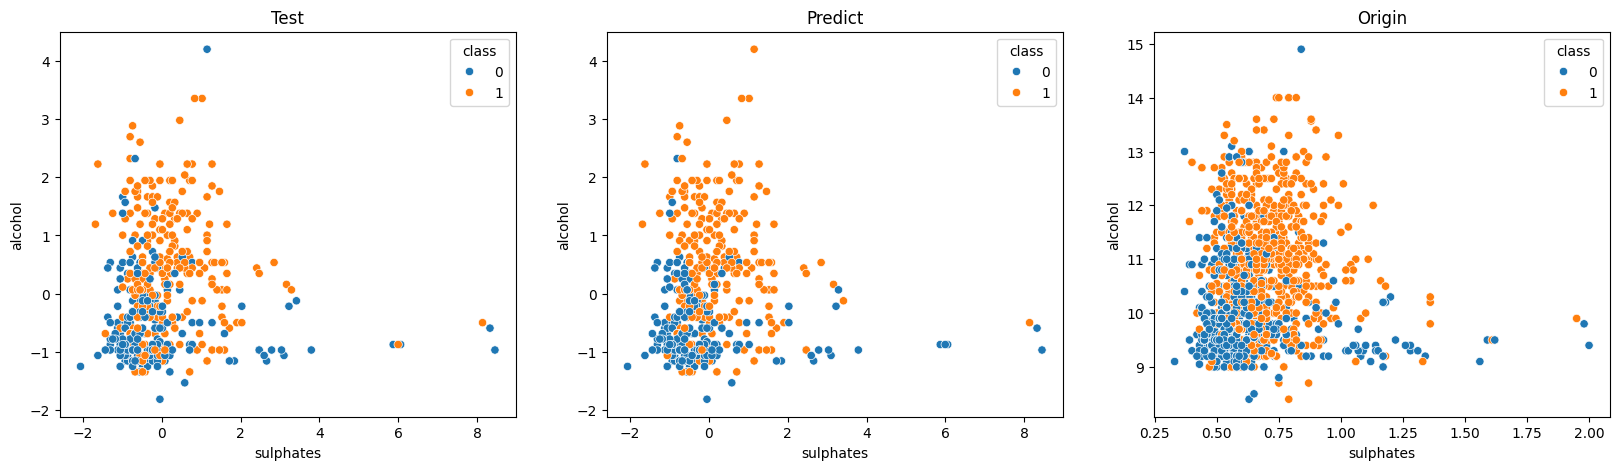

In [19]:
x_sulphates = []
x_alcohol = []

for i in range(len(X_test)):
  x_sulphates.append(X_test[i][1])
  x_alcohol.append(X_test[i][0])


plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=x_sulphates, y=x_alcohol, hue=y_test)
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 3, 2)
sns.scatterplot(x=x_sulphates, y=x_alcohol, hue=y_pred)
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['sulphates'], y=df['alcohol'], hue=df['quality'])
plt.legend(title='class')
plt.title('Origin')

plt.show()

При исключении неважных признаков результаты модели улучшились.

# Regression

In [20]:
df = df_copy
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
X = df.iloc[:, :11]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Decision Tree Regressor**

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dtr = DecisionTreeRegressor(max_depth=5, random_state=15)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
print(f'Test MSE = {mean_squared_error(y_test, y_pred)}')
print(f'Test MAE = {mean_absolute_error(y_test, y_pred)}')

y_pred_train = dtr.predict(X_train)
print(f'Train MSE = {mean_squared_error(y_train, y_pred_train)}')
print(f'Train MAE = {mean_absolute_error(y_train, y_pred_train)}')

Test MSE = 0.47542794582978015
Test MAE = 0.5208362749099762
Train MSE = 0.32251433114746425
Train MAE = 0.44378899570831387


**Random Forest Regressor**

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rfr = RandomForestRegressor(n_estimators=100, random_state=15)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
print(f'Test MSE = {mean_squared_error(y_test, y_pred)}')
print(f'Test MAE = {mean_absolute_error(y_test, y_pred)}')

y_pred_train = rfr.predict(X_train)
print(f'Train MSE = {mean_squared_error(y_train, y_pred_train)}')
print(f'Train MAE = {mean_absolute_error(y_train, y_pred_train)}')

Test MSE = 0.36010770833333333
Test MAE = 0.43027083333333327
Train MSE = 0.047444593386952644
Train MAE = 0.15738159070598745
